# Time series forecasting:
is a method used to predict future values of a variable based on its past historical data, assuming that the patterns observed in the past will continue into the future

1. Ordering is very important because there is a dependency on time andchanging the order could change the meaning of the data.

2. to accurately forecast future values,we'll need each measurement of data to be taken across sequential andequal intervals, and with each time unit having at most one data point.

## Once we have collected our data, as a business analyst,we have two objectives in mind.

* First, identifying the patterns represented by the sequence of observations

* second, forecasting orpredicting future values of the time series.The patterns we observe will tell us the story of how our business interacts withtime.

## Attributes of a Time Series
* It's over a continuous time interval
* There are sequential measurements across that interval
* There is equal spacing between every two consecutive measurements
* Each time unit within the time interval has at most one data point

## Components of time series:

1. **Trend** : is a gradual shift or movement to relatively higher or lower values over a long period of time.

2. **Seasonality** : A time series that exhibits a repeating pattern at fixed intervals of timewithin a one year period is said to have a seasonal pattern or seasonality.Seasonality is a common pattern seen across many different kinds of timeseries.

  For example, if you live in a climate with cold Winters and warm Summersyour home's air conditioning costs probably rise in the summer andfall in the winter.

3. **Noise** : refers to the random variation or unpredictable fluctuations in a time series that do not follow any pattern—neither trend, nor seasonality, nor cycles.

4. **Cyclic patterns** :A cyclical pattern exists, when data exhibits rises andfalls that are not of a fixed period.

  Example: business cycles which usually last several years, butwhere the length of the current cycle is unknown beforehand.In finance, times of expansion andrecession in the stock market reveal cyclical patterns.A cyclical uptrend is referred to a bull market,while a cyclical downtrend is referred to as a bear market.

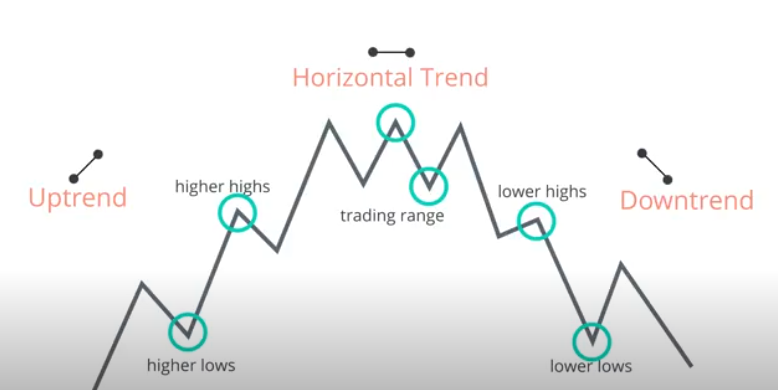

# 1. Naïve Methods (Baseline Models)

1. **Naïve Forecast** : Forecast = last observed value.

2. **Seasonal Naïve** : Forecast = value from the same season last cycle.

3.  **Average (Mean) Forecast** : Forecast = mean of past values.

# 2. Classical Statistical Models
1.  **Moving Average (MA)**
* Forecast = average of recent past values.
* Simple, Weighted, Exponential Smoothing.

2. **Exponential Smoothing (ETS family)**
* Simple Exponential Smoothing (SES): Good for level data (no trend/seasonality).

* Holt’s Linear Trend: Handles trend.

* Holt-Winters (Triple Exponential): Handles trend + seasonality.

3. **ARIMA (AutoRegressive Integrated Moving Average)**

* Good for stationary data.

* AR (AutoRegression) + I (Integration for trend) + MA (Moving Average).

* ARIMA(p,d,q) and SARIMA (seasonal version).

# Exponential Smoothing


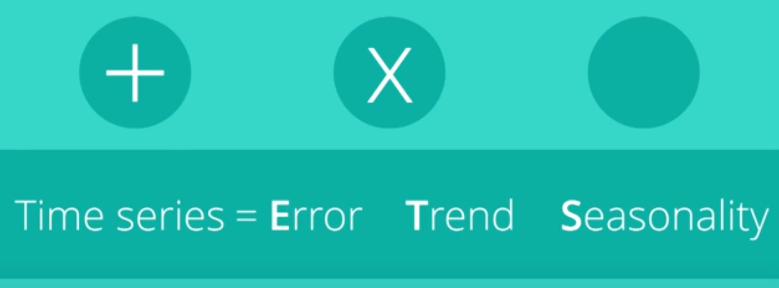

### Time series decomposite plot

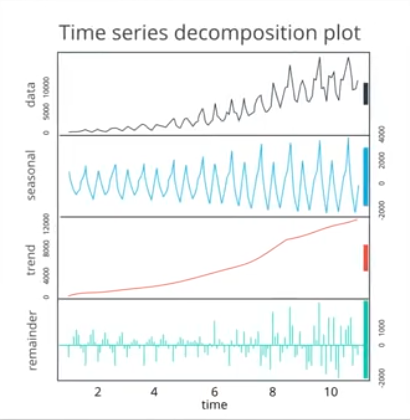

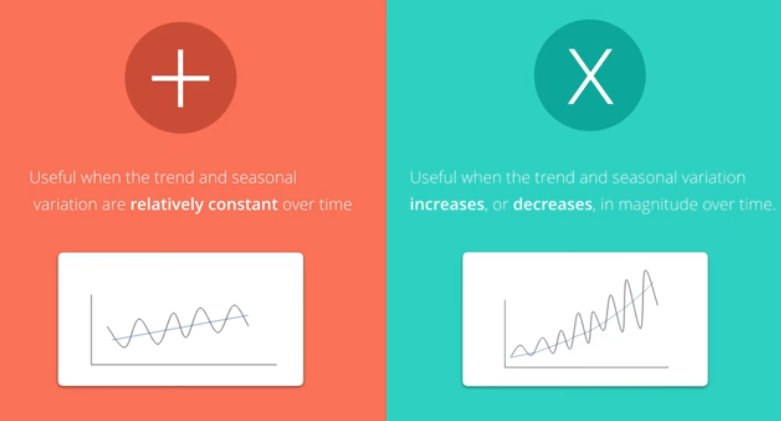

 The possible time series (TS) scenarios can be recognized by asking the following questions:

TS has a trend?
* If yes, is the trend increasing linearly or exponentially?
TS has seasonality?
* If yes, do the seasonal components increase in magnitude over time?
Scenarios

Therefore the scenarios could be:
* No-Trend, No-Seasonal
* No-Trend, Seasonal-Constant
* No-Trend, Seasonal-Increasing

* Trend-Linear,No-Seasonal
* Trend-Linear,Seasonal-Constant
* Trend-Linear,Seasonal-Increasing


* Trend-Exponential,No-Seasonal
* Trend-Exponential,Seasonal-Constant
* Trend-Exponential,Seasonal-Increasing


ETS Models
1. Simple Exponential Smoothing Method
2. Holt's Linear Trend Method
3. Exponential Trend Method
4. Holt-Winters Seasonal Method

## **Simple Exponential Smoothing**


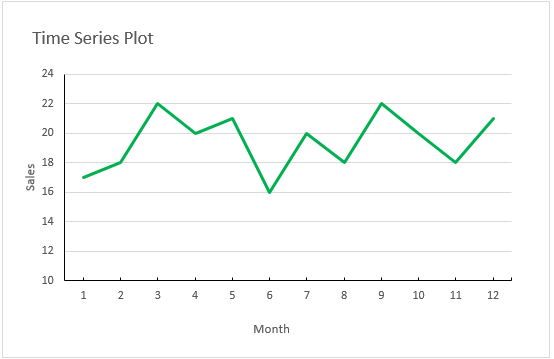

Time series :
1. does not have a trend line
2. and does not have seasonality component.

* We would use a Simple Exponential Smoothing model.

Forecast = Weightt Yt + Weightt-1 Yt-1 + Weightt-2 Yt-2 + ... + (1-α)n Yn

where

t is the number of time periods before the most recent period (e.g. t = 0 for the most recent time period, t = 1 for the time period before that).

Yt = actual value of the time series in period t

Weightt = α(1-α)t

n = the total number of time periods

1. The smoothing parameter can be set for any value between 0 and 1.


2. If the smoothing parameter is close to one, more recent observations carry more weight or influence over the forecast (if α = 0.8, weights are 0.8, 0.16, 0.03, 0.01, etc.).


3. If the smoothing parameter is close to zero, the influence or weight of recent and older observations is more balanced (if α = 0.2, weights are 0.2, 0.16, 0.13, 0.10, etc.).

# Holt's Linear Trend Method ( Double Exponential Smoothing)

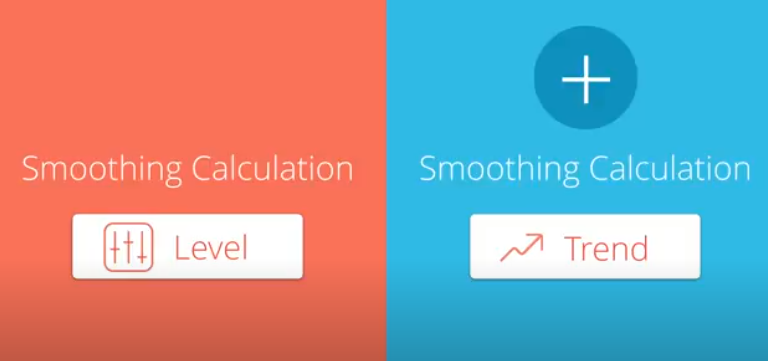

# Exponential Trend Method


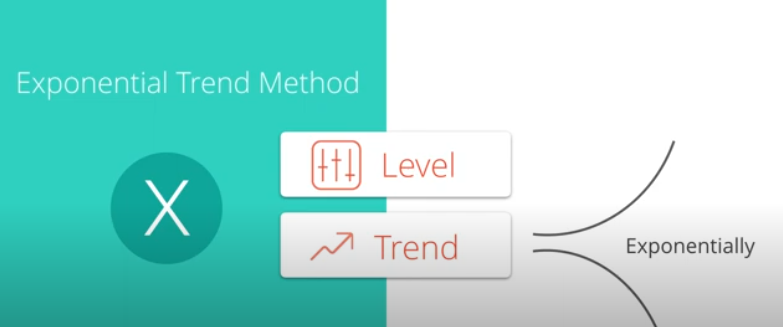

# Holt-Winters Seasonal Method


# Lets apply the Exponential Smoothing (ETS family) on a booking data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Excel file
df = pd.read_excel('/content/drive/MyDrive/bookings.csv.xlsx')

# Display first few rows
df.head()

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366
2,2006,Mar,250
3,2006,Apr,318
4,2006,May,334


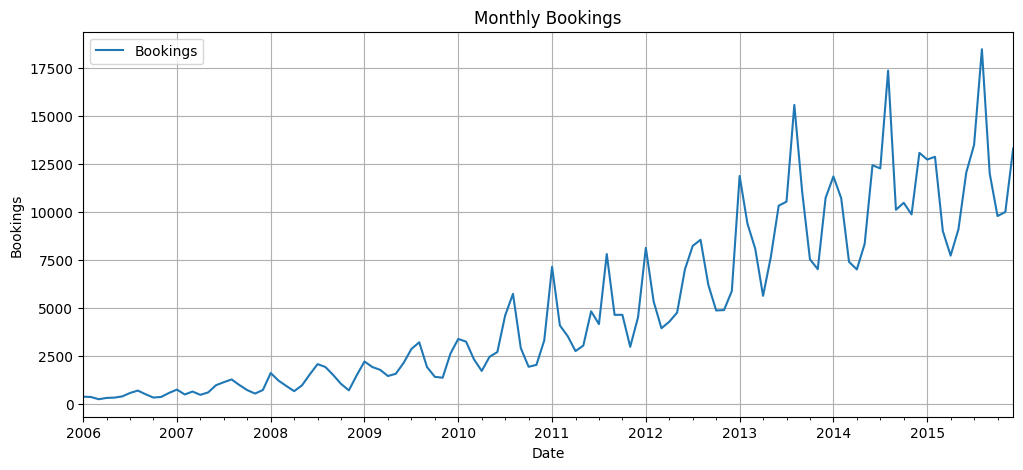

In [ ]:
# Step 2: Combine 'Year' and 'Month' into a datetime column
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Step 3: Set datetime as index and sort
df.set_index('date', inplace=True)
df = df[['Bookings']].asfreq('MS')  # MS = Month Start

# Step 4: Plot the data
df.plot(figsize=(12,5), title='Monthly Bookings')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.grid()
plt.show()

In [ ]:
df.head()

,Bookings
date,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334


In [ ]:
# Step 5: Split into train/test (e.g., last 12 months for testing)
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
# Step 6: Apply Holt-Winters (ETS)
model = ExponentialSmoothing(
    train['Bookings'],
    trend='add',             # Linear trend
    seasonal='add',          # Additive seasonality
    seasonal_periods=12      # Monthly seasonality (1 year)
).fit()

In [ ]:
# Step 7: Forecast
forecast = model.forecast(12)

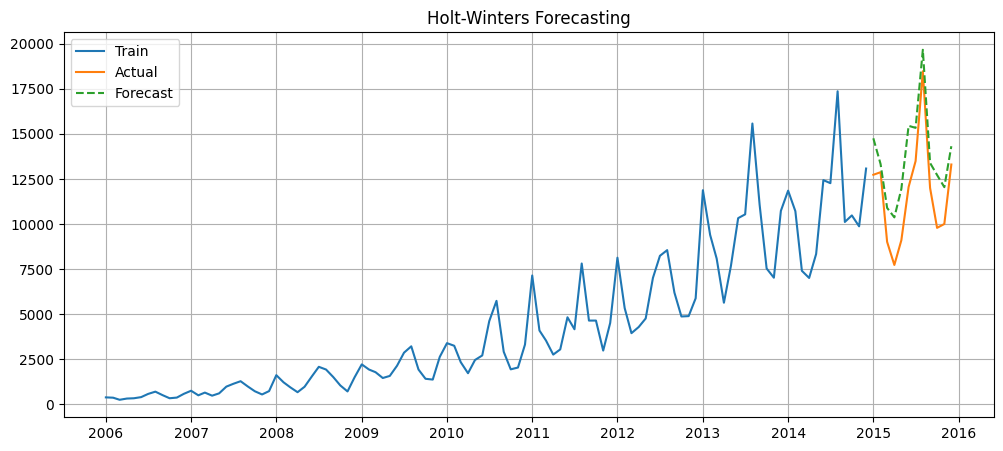

In [ ]:
# Step 8: Plot forecast vs actual
plt.figure(figsize=(12,5))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index, test['Bookings'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Holt-Winters Forecasting')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Step 9: Evaluate
mae = mean_absolute_error(test['Bookings'], forecast)
rmse = np.sqrt(mean_squared_error(test['Bookings'], forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1971.31
RMSE: 2140.92


# Compare all Models

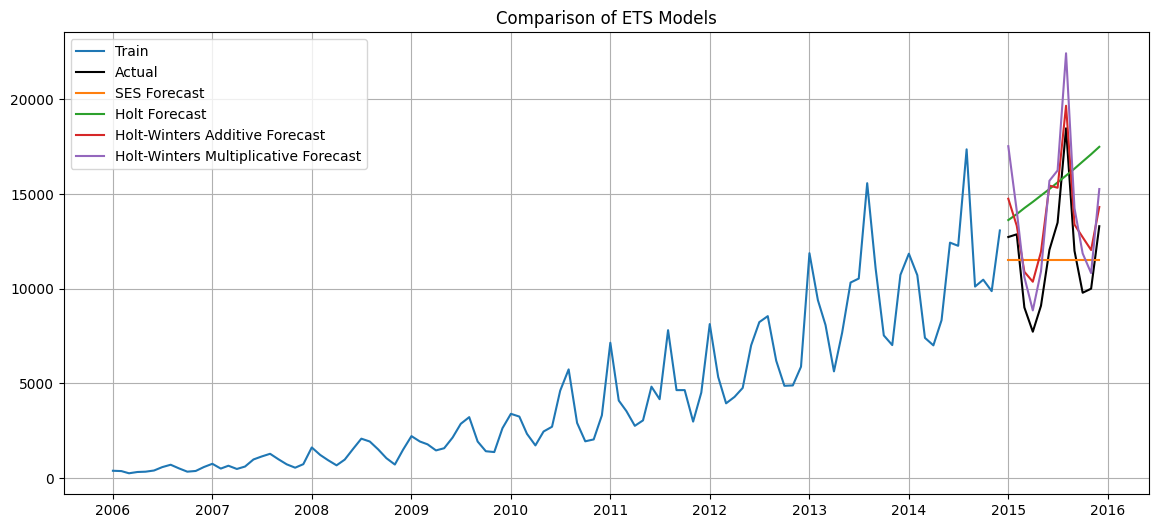


Model Performance:
SES: MAE = 2188.72, RMSE = 2755.56
Holt: MAE = 4192.24, RMSE = 4713.03
Holt-Winters Additive: MAE = 1971.31, RMSE = 2140.92
Holt-Winters Multiplicative: MAE = 2339.64, RMSE = 2618.31


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load and preprocess data
df = pd.read_excel('/content/drive/MyDrive/bookings.csv.xlsx')  # Adjust path if needed
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')
df.set_index('date', inplace=True)
df = df[['Bookings']].asfreq('MS')  # Monthly Start frequency

# Train-test split
train = df.iloc[:-12]
test = df.iloc[-12:]

results = {}  # Store performance metrics

# Model 1: Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train['Bookings']).fit()
ses_forecast = ses_model.forecast(12)

results['SES'] = {
    'forecast': ses_forecast,
    'MAE': mean_absolute_error(test['Bookings'], ses_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['Bookings'], ses_forecast))
}

# Model 2: Holt’s Linear Trend
holt_model = ExponentialSmoothing(train['Bookings'], trend='Mul', seasonal=None).fit()
holt_forecast = holt_model.forecast(12)

results['Holt'] = {
    'forecast': holt_forecast,
    'MAE': mean_absolute_error(test['Bookings'], holt_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['Bookings'], holt_forecast))
}

# Model 3: Holt-Winters Additive
hw_add_model = ExponentialSmoothing(train['Bookings'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_add_forecast = hw_add_model.forecast(12)

results['Holt-Winters Additive'] = {
    'forecast': hw_add_forecast,
    'MAE': mean_absolute_error(test['Bookings'], hw_add_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['Bookings'], hw_add_forecast))
}

# Model 4: Holt-Winters Multiplicative
hw_mul_model = ExponentialSmoothing(train['Bookings'], trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_mul_forecast = hw_mul_model.forecast(12)

results['Holt-Winters Multiplicative'] = {
    'forecast': hw_mul_forecast,
    'MAE': mean_absolute_error(test['Bookings'], hw_mul_forecast),
    'RMSE': np.sqrt(mean_squared_error(test['Bookings'], hw_mul_forecast))
}

# 📊 Plot All Forecasts
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index, test['Bookings'], label='Actual', color='black')

for name, res in results.items():
    plt.plot(res['forecast'].index, res['forecast'], label=f'{name} Forecast')

plt.title("Comparison of ETS Models")
plt.legend()
plt.grid()
plt.show()

# 📋 Print Performance Comparison
print("\nModel Performance:")
for name, res in results.items():
    print(f"{name}: MAE = {res['MAE']:.2f}, RMSE = {res['RMSE']:.2f}")
